<h1 style="text-align:center">NYC Open Data Week at TIQC</h1>
<h2 style="text-align:center">Introduction to Machine Learning</h2>

<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" width="200px" height="200px" align="center" >

<img src="https://opendata.cityofnewyork.us/wp-content/themes/opendata-wp/assets/img/nyc-open-data-logo.svg" width="200px" height="200px" align="left" >

<img src="https://techincubatorqc.com/wp-content/uploads/2020/02/cropped-TechIncubator_web_black_red_logo-1.png" width="200px" height="200px" align="right" padding="top" >



Machine learning involves building mathematical models to help
understand data. “Learning” enters the fray when we give these models tunable
parameters that can be adapted to observed data; in this way the program can be considered
to be “learning” from the data. Once these models have been fit to previously
seen data, they can be used to predict and understand aspects of newly observed data.

## Categories of Machine Learning

**Supervised learning** involves somehow modeling the relationship between measured
features of data and some label associated with the data; once this model is determined,
it can be used to apply labels to new, unknown data. This is further subdivided
into classification tasks and regression tasks: in classification, the labels are
discrete categories, while in regression, the labels are continuous quantities. We will
see examples of both types of supervised learning in the following section.<br>

**Unsupervised learning** involves modeling the features of a dataset without reference to
any label, and is often described as “letting the dataset speak for itself.” These models
include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for
more succinct representations of the data. We will see examples of both types of
unsupervised learning in the following section.

**Semi-supervised learning**, which fall somewhere
between supervised learning and unsupervised learning. Semi-supervised
learning methods are often useful when only incomplete labels are available.

**Reinforcement learning** simulates how an actor would accomplish an objective such as winning a video game. Self driving cars or A.I. that learns how to play games like [Dota 2](https://openai.com/projects/five/) or [Doom](https://github.com/mwydmuch/ViZDoom) use reinforcement learning.

Source: [Python Data Science Handbook](https://www.oreilly.com/library/view/python-data-science/9781491912126)

# Table of Contents

<div class = "alert alert-info">

1. [Loading the data](#1)<br>
    
2. [Supervised Machine Learning](#2)<br>
    
3. [Unsupervised Machine Learning](#3) <br>
  
  

</div>
<hr>

## The Greener, Greater Buildings historical data set

New York's [Greener, Greater Buildings](https://www.nyc.gov/html/gbee/downloads/pdf/greener_greater_buildings_plan.pdf) program is a sustainable growth iniative that aims to reduce greenhouse gas emissions by 30%. The program focusses on large buildings which consume the most resources. The stewards of these buildings must annually release public benchmarks of water and energy use. The buildings will also go through retro commissioning and audits every decade to help reduce resource use. Finally, non-commercial residential buildings must meet improved lighting codes.

The [clean heat](https://data.cityofnewyork.us/City-Government/NYC-Clean-Heat-Dataset-Historical-/8isn-pgv3) sample contains 4789 observations of the energy use for heating of buildings across New York City. The data contain information on the building's borough, Neighborhood Tabulation Area (NTA), owner, address, boiler type, fuel used, square footage, energy use, as well as if the building is part of the initative. Some of the features are a bit messy with miscoded values or types that are parsed incorrectly as Strings rather than numbers. 

**Data Provided by the Mayor's Office of Sustainability (MOS)**

Source: https://data.cityofnewyork.us/City-Government/NYC-Clean-Heat-Dataset-Historical-/8isn-pgv3

# Importing the clean heat data set <a id=1></a>

Python is a minimalist, almost Spartan programming language that is designed around easy of use. Scientists have steadily adopted the language which has lead to explosive growth in recent years. As a general purpose programming language, Python is vastly more powerful than other domain specific languages such as R or SAS.

Our workshop focusses on machine learning, but we'll be using several common, open source scientific Python libraries including:

* [NumPy](https://numpy.org/) - n dimensional arrays and linear algebra.
* [pandas](https://pandas.pydata.org/) - Columnar data frames.
* [Matplotlib](https://matplotlib.org/stable/index.html) - Lower level plotting and drawing interface.
* [Seaborn](https://seaborn.pydata.org/) - Higher level plotting interface with good defaults
* [scikit-learn](https://scikit-learn.org/stable/) - Machine learning algorithms with a consistent interface.

This workshop assumes that you **have a working Python 3 installation with the above libraries installed.** An easy way to get everything set up is to install [Anaconda](https://anaconda.org/) which is a free and open source package manager for scientific Python as well as R. Anaconda is available for Linux, Windows, and macOS. Anaconda is preferable to managing your own environment or using your system installation of Python (unless you're absolutely sure you know what you're doing).

In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

clean_heat = pd.read_csv("NYC_Clean_Heat_Dataset__Historical_.csv")

The code above simply loads several of the libraries we'll be using under the common aliases as well as loads the data set into a variable called _clean_heat_.

The libraries above, including scikit-learn, don't require your data to be stored as a pandas DataFrame. However, using DataFrames greatly simplifies a lot of the prerequisite work.

# Data cleaning (placeholder)

To do:

Fix Borough.
Fix sqft.

Preprocessing notes: 
Average of low/high for feature engineering
Clean up building_type by collapsing categories

Plots for EDA (don't run yet):
fig_sqftgal, ax_sqftgal = plt.subplots(figsize=(12, 10))
sns.scatterplot(x="bldg_sqft", y="total_gallons_high", hue="greener_greater_buildings",
data=clean_heat, ax=ax_sqftgal)

**explain code in separate chunks**
**add domain knowledge thingy**

In [77]:
clean_heat.columns = clean_heat.columns.str.lower().str.replace(' ', '_')

clean_heat.rename(columns={"total_gallons_(high)": "total_gallons_high",
                           "total_gallons_(low)": "total_gallons_low",
                           "total_mmbtu_(high)": "total_mmbtu_high",
                           "total_mmbtu_(low)": "total_mmbtu_low",
                           "boiler_capacity_(gross__btu)": "boiler_cap_btu",
                           "condo?": "condo",
                           "coop?": "coop",
                           "#_of_identical_boilers": "num_ident_boilers",
                           "#_of_bldgs": "num_bldgs",
                           "#_of_floors": "num_floors",
                           "#_of_res._units": "num_res_units",
                           "est._retirement_year": "est_retire_yr"},
                  errors="raise",
                  inplace=True)

# Descriptive categories
clean_heat.primary_fuel.replace({"#6": "Residual fuel",
                                 "#4": "Distillate fuel (#4)"},
                                inplace=True)

# The square feet variable is a String rather than an int
clean_heat.bldg_sqft = pd.to_numeric(clean_heat.bldg_sqft.str.replace("[\*|,]", "",
                                                                      regex=True))

# Miscoded points
# The data contain a handful of very strange observations!
# At least three points pointed to City Hall with sixty times the gallons
# used of the next maximum observation. I attempted to research the odd points
# but found nothing; filtering them out is probably the safest bet.
# Ultimately, we're filtering everything above 400K because the amount of observations
# is very small and we lack the domain knowledge to really know if they're "right".
clean_heat.loc[(clean_heat.total_gallons_high > 400000) |
               (clean_heat.total_gallons_low > 400000) |
               (clean_heat.total_gallons_high < 10) |
               (clean_heat.total_gallons_low < 10),
               ["total_gallons_high", "total_gallons_low"]] = np.nan

# The MMBTU features had similar weirdness. For example, there are at least
# six samples with low > high while also having strange numbers that are much
# higher than the rest of the data.
clean_heat.loc[(clean_heat.total_mmbtu_high > 50000) |
               (clean_heat.total_mmbtu_low > 50000) |
               (clean_heat.total_mmbtu_high == 0) |
               (clean_heat.total_mmbtu_low == 0),
               ["total_mmbtu_high", "total_mmbtu_low"]] = np.nan

# Incorrect building square footage
clean_heat.loc[clean_heat.bldg_sqft > 1500000, "bldg_sqft"] = np.nan

# Boiler capacity incorrect values
clean_heat.loc[clean_heat.boiler_cap_btu > 500, "boiler_cap_btu"] = np.nan

# These features/columns encode NaNs as zero
zero_nans_cats = ["#6_deadline", "ggb_deadline", "est_retire_yr",
                  "boiler_installation_date", "year_built"]

# Zero as NaNs but not categorical variables
zero_nans_oth = ["bldg_sqft", "boiler_cap_btu", "total_units"]

for col in zero_nans_cats + zero_nans_oth:
    clean_heat[col].replace({0: np.nan}, inplace=True)
    
# Change ALL CAPS to title case
for all_caps in ["street_address", "building_manager",
                "owner", "owner_address"]:
    clean_heat[all_caps] = clean_heat[all_caps].str.title()

# List of (most) categorical columns
cats = ["borough", "primary_fuel", "utility",
       "greener_greater_buildings", "ggb_deadline",
       "num_ident_boilers", "building_type",
       "council_district", "community_board",
       "condo", "coop", "nta"] + zero_nans_cats

# Convert the types of each categorical
for cat in cats:
    clean_heat[cat] = clean_heat[cat].astype("category")
    
# Mild feature engineering
clean_heat["avg_mmbtu"] = (clean_heat.total_mmbtu_high + clean_heat.total_mmbtu_low)/2
clean_heat["avg_gallons"] = (clean_heat.total_gallons_high + clean_heat.total_gallons_low)/2

# Exploratory data analysis

Exploratory data analysis, or EDA, is one of the pivotal steps of the data analysis as well as machine learning pipeline. ML requires an intimate knowledge of the data in order to understand which models to apply as well which variables may be useful. ML is not an automatic process despite the elegance and simplicity of the sklearn library.

Data cleaning and preprocessing both help understanding, but literally plotting and **looking** at your data can uncover trends, problems, and variables to consider. Like the data cleaning section we don't expect you to go through the process yourself as this workshop is on machine learning. However, we will go through a few useful visualizations so that you may look at the data yourself!

## Proportions of classes

Categorical variables may be unbalanced in terms of their classes. For example, a class may dominate the sample with a high proportion of observations. Another potential problem is that a categorical feature may contain _many_ classes that each make up a small proportion of the total. Both of these issues are problems, and the clean heat data contain examples of each.

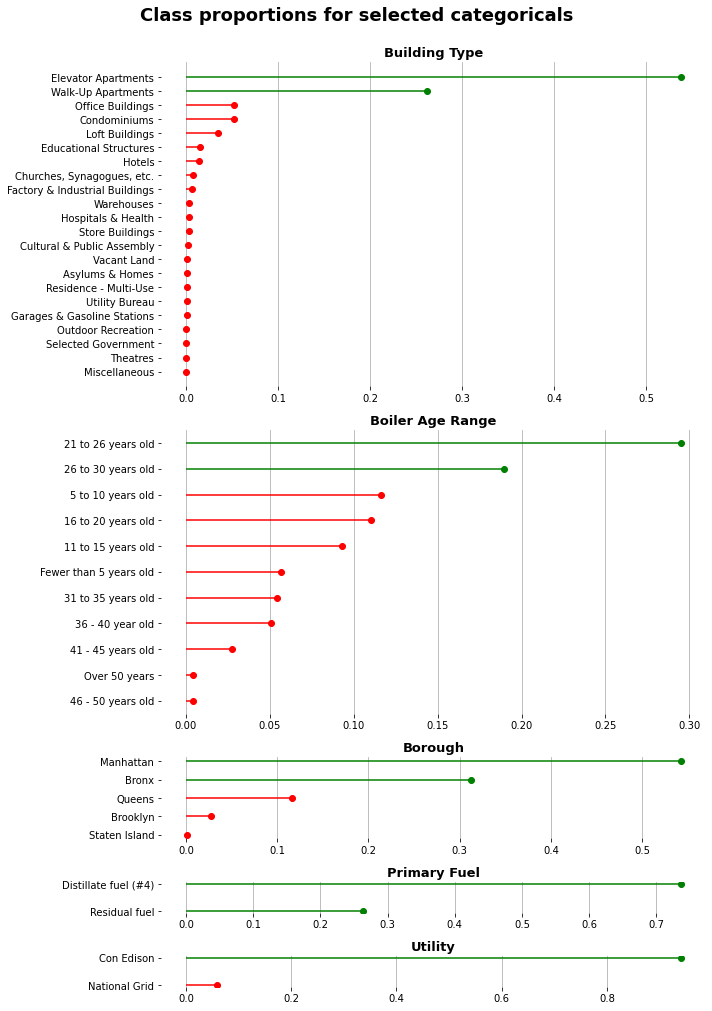

In [6]:
PROP_THRESH = 0.15

fig_catcount, ax_catcount = plt.subplots(5,
                                         #sharex=True,
                                         figsize=(10, 14),
                                         gridspec_kw={"height_ratios": [16, 14, 4, 1.5, 1.5]})

for col, ax in zip(["building_type",
                    "boiler_age_range",
                    "borough",
                    "primary_fuel",
                    "utility"],
                   ax_catcount.flat):

    # Proportions are cleaner.
    prop_cat = clean_heat[col].value_counts(normalize=True)
    prop_cat.sort_values(inplace=True)

    # We'll use different colors to draw attention to low proportions
    colors = ["red" if prop <= PROP_THRESH else "green" for prop in prop_cat]
    ax.hlines(prop_cat.index, xmin=0, xmax=prop_cat, colors=colors)
    
    # We can probably make this cleaner.
    # Plot the circles for each based on whether they're too small or not.
    # Maybe change the colors later?
    prop_small = prop_cat[prop_cat <= PROP_THRESH]
    prop_ok = prop_cat[prop_cat > PROP_THRESH]
    ax.plot(prop_small, prop_small.index, 'or',
            prop_ok, prop_ok.index, 'og')
    
    # Labels and customization
    ax.set_title(col.replace('_', ' ').title(),
                 {"size": 13,
                  "weight": "bold"})
    # We don't need axis labels
    ax.set_xlabel("")
    ax.set_ylabel("")
    # We only need an x grid rather than both.
    ax.grid(axis="x")
    ax.set_axisbelow(True)
    ax.set_frame_on(False)

# Figure customization
fig_catcount.suptitle("Class proportions for selected categoricals",
                      y=1,
                      fontproperties={"size": 18,
                                      "weight": "bold"})
fig_catcount.tight_layout()

The plot above shows the proportion of classes for selected categorical variables. Green lines indicate classes that make up at least 16% of the variable while red is 15% and under.

**Questions:** (You don't have to answer all of them.)

* Which variables have class issues and why?
* Is a 15% threshold too low?
* How might greatly unbalanced classes affect analysis?
* How may we fix these variables (if they're repairable)?

## Distribution of selected numerical variables

One of the most useful EDA techniques is to plot the distributions of numerical variables. Histograms or KDE (density) plots visualize the full range of data. Rug plots display where the actual observations lay under the density estimate. Let's take a look at both.

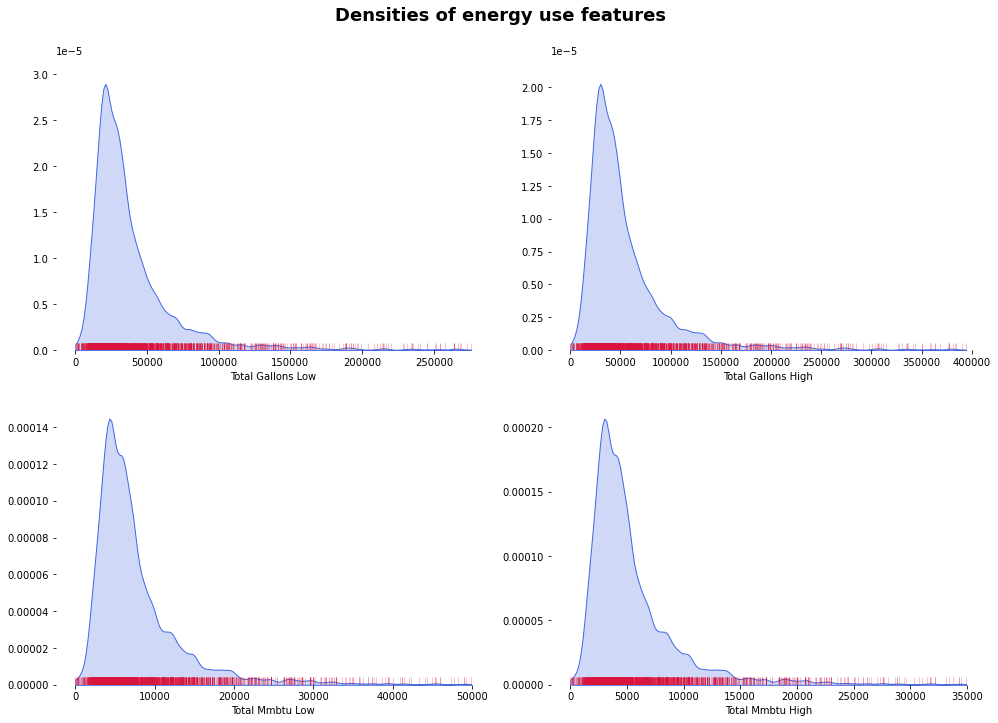

In [66]:
fig_gal_dist, axes_gal_dist = plt.subplots(2, 2, figsize=(14, 10))

for col, ax in zip(["total_gallons_low", "total_gallons_high",
                   "total_mmbtu_low", "total_mmbtu_high"],
                  axes_gal_dist.flat):
    
    # KDE plot showing the full range of data.
    # The estimation process is cut off to prevent negative values.
    sns.kdeplot(x=col,
                cut=0,
                ax=ax,
                bw_adjust=0.5,
                color="royalblue",
                fill=True,
                data=clean_heat)
    
    # Rug plot showing the actual data points.
    sns.rugplot(x=col,
                ax=ax,
                data=clean_heat,
                color="crimson",
                alpha=.25)
    
    ax.set_xlabel(col.replace('_', ' ').title())
    # Label is clear from title.
    ax.set_ylabel("")
    ax.set_frame_on(False)

# Figure titles
fig_gal_dist.suptitle("Densities of energy use features",
                      y=1,
                      fontproperties={"size": 18,
                                      "weight": "bold"})
fig_gal_dist.tight_layout()

We can see exactly where the observations are from the rug plot (red) and density (blue). We used these plots to figure out missing and strange values. The density plot was heavily skewed to the right so that the density was squished to the left. We opted to conservatively drop data as we lack domain knowledge on boilers and energy use from heating.

## Scatter plot

Bi/multivariate plots, such as scatter plots, help visualize trends across more than one variable. Looking at trends visually helps us craft models because we can actually see our data laid out for us. Of course, plots aren't a substitute for rigorous analysis because visual trends may still fall within the margin of errors.

(1.0, 500000.0)

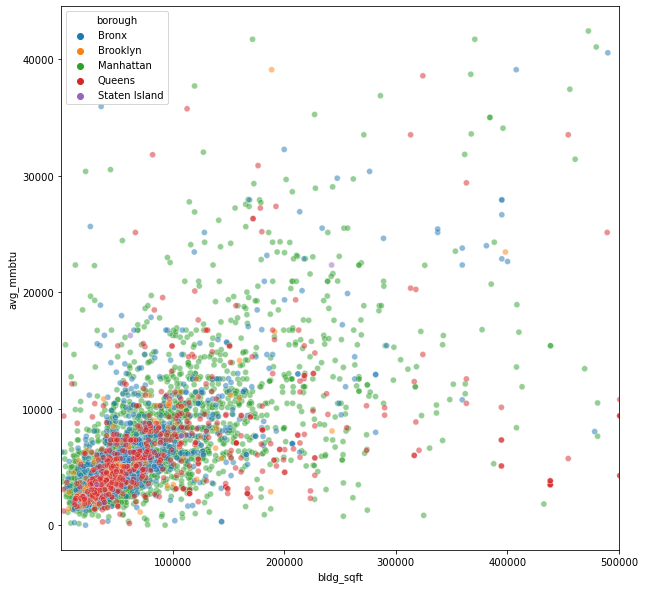

In [78]:


# TEMP

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x="bldg_sqft", y="avg_mmbtu", hue="borough", data=clean_heat, ax=ax, alpha=0.5)
ax.set_xlim(1, 500000)

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/super.jpg"> <a id=2></a>

## K-Nearest Neighbors (KNN)

KNN is simple yet performant supervised machine learning algorithm.

Let's say we have a classification problem where we're trying to label an unknown point, p, that may be _red_ or _blue_. A reasonable approach is to look at the p's _nearest neighbors._ If the point is closest to more blue then we classify it as blue and vice versa for red. We decide based on the _k_ nearest neighbors. For example, if the point is near three red with a _k_ of five then we can reasonably assume that p is red with a 60% chance (that is, $\frac{3}{5}=.6$). This process is known as **voting.**

KNN also works for regression. KNN regression calculates the mean of the nearest neighbors as a prediction instead of calculating the probability that a point is of a certain class.

In other words, birds of a feather flock together. Despite the seeming simplicity, KNN is a remarkably good algorithm. Let's look at a simple model to try out KNN.

## The scikit-learn workflow via a simple model

* Clean the data
* Split data into training and test sets
* Apply preprocessing such as scaling the variables to the **training set only**
* Choose a model type that best represents the problem domain
* Tune the model's hyper parameters
* Fit and test model's robustness on the test set (which will be scaled by the training set's parameters)

As mentioned earlier, our data set isn't really designed for prediction. However, we can still use what we have in order to demonstrate the models.

We already cleaned the data with the exception of handling missing values. Null values is a complicated topic in data as how we handle them is entirely dependent on the type of missing value as well as our problem. The worst technique is to fill the missings by the mean or median. Imputation is out of the scope of this workshop, so we'll drop the nulls for convenience.

### Training and testing sets

### Why?
ML models are tested on new or unseen data in order to quantify robustness. In other words, we need to test how well our model performs by using data beyond what was "learned." Thus, the data are split into **training** and **test** sets in order to fit the model to training set and quantify performance using the test set. **We do not touch the test set.** The test set shouldn't be used at all to influence to model. For example, you should standardize your training set _only_ rather than standardizing the entire data set at once. Standardizing the entire data set technically "leaks" information from the testing set into the training set. This is appropriately known as **data leakage**. Scikit-learn's `Pipeline` API mitigates data leakage for you by applying any scaling correctly.

### Sklearn's train_test_split

Let's split the data into training and set sets using scikit-learn. The function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) shuffles and splits data randomly. Key parameters include:

* The X (predictors) and y (response) data.
* test_size: a optional number or proportion that indicates the amount of data to include in the test set
* train_size: ditto for training
* random_state: random seed used to reproduce the split
* shuffle: randomly shuffle the data prior to splitting
* stratify: sample the data based on the strafication of a certain variable

The test size defaults to 25% of the data, but different splits may be applied as well. You also don't need to supply both the _test_size_ and _train_size_ parameters as _train_size_ defaults to the complement of _test_size_ and vice versa.

Stratification is useful when classes are imbalanced. For example, we may stratify on an imbalanced response for consistency or else we may end up with a training set that is missing some of the classes!

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

clean_heat_knn = clean_heat[["num_floors", "avg_gallons", "greener_greater_buildings"]].dropna()

X_train, X_test, y_train, y_test = train_test_split(clean_heat_knn.drop(columns=["greener_greater_buildings"]),
                                                    clean_heat_knn.greener_greater_buildings,
                                                    random_state=42)

We first import the required functions and classes. If we were doing a regression we would import [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) instead.

As discussed above, we have to drop `NaN`s from our columns. We selected the columns we need and dropped `NaN`s from the subset rather than drop nulls across the data set. Dropping nulls across the data set would throw away _much_ more data.

Finally, we call `train_test_split` and pass in our X and y with a `random_state` of 42 for reproducibility. We opted not to stratify on our target, `greener_greater_buildings`, because the mix between the categories is healthy.

The variable names `X_train`, `X_test`, `y_train`, and `y_test` are standard.

### Fitting (training) the model

In [4]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

Estimating the parameters used by a model from the data is known as fitting or training a model. For example, anyone familiar with linear regressions likely knows that the equation for the model is $\hat{y} = \beta_0 + \beta_{X1} + \beta_{X2..Xp} + \epsilon$. Each $\beta$ is a parameter for a slope or constant (i.e. intercept or dummy variable constant) that is learned from the data by minimizing a loss function.

Don't worry if this sounds complicated or the math looks scary. The point is that fitting is a process that "learns" parameters from the data. Some models, like the linear regression above, learn a few parameters while others are vastly more complicated.

The first step is to create the KNN classifier object. We pass any tunable parameters (hyperparameters) to the classifier object. As you probably guessed, `n_neighbors` is the nearest neighbors hyperparameter. Hyperparameters are **not learned** by the model hence why they're "tunables." Instead, the research must tweak the hyperparameters based on their own knowledge of the model or data. We can also pass a different distance function to KNN, but that's out of the scope of this workshop.

Next up is fitting the model. All we have to do here is call `fit()` with the training sets for X and y.

Scikit-learn's model classes return the model object themselves. Thus, we can chain the method calls above rather than placing them on separate lines. For example, the line below are equivalent to the code above.

In [80]:
knn_clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

### Scoring the model

Classification and regression both have **many** metrics to score performance. For classification, the simplest scoring metric is **accuracy** which is simply the proportion of correct positive and negative predictions. For example, 95% accuracy means that the model distinguished the classes correctly 95% of the time.

$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

**T** = True,

**F** = False,

**P** = Positive,

**N** = Negative


Thus TP = **True Positive**. You don't need to memorize these for this workshop.

Other score metrics determine the amount of correct positives _or_ the amount of correctly predicted negatives. This is out of the scope of the workshop, but understanding _why_ one may be concerned about just positive or negatives is important. A researcher may be building a model to predict a rare disease that affects only 0.01% of the population. A model can be 99.99% accurate by predicting the negative class each time. However, that's obviously a poor model for the researcher's situation! Thus, different metrics are useful depending on the research.

KNN's default `score()` function returns accuracy. Thus, we can test the accuracy of the model on both the training and test sets like so:

In [81]:
print(f"Training set score: {knn_clf.score(X_train, y_train)}")
print(f"Testing set score: {knn_clf.score(X_test, y_test)}")

Training set score: 0.8299801643525078
Testing set score: 0.7697536108751062


Notice that the training score is higher than the testing score. We're witnessing a common problem known as **overfitting**. Models should be robust to new data (i.e. for predictions). However, models may be prone to learning the noise in a data set or may get caught up on minute details rather than the trend. Models should be able to generalize therefore a training set score higher than the testing is a clear problem.

Here's an analogy for the problem of overfitting. Imagine a student has a test and is given a pretest to study. The pretest has similar questions to the final test but with some differences. The student unwisely decides to memorize the pretest. During the final test the student fills in the memorized answers leading to a great big _zero_. The student overfit to the training test and failed the actual test.

Lower `k` is associated with model complexity which in turn is associated with overfitting. Higher `k` is simplifies the model but a too simple model _underfits_. Underfit models perform poorly all around.

So the question is...

### How do we choose the best k? (Elbow plots)

Finding the best `k` is actually not that difficult. One strategy is to create an elbow plot. Elbow plots graph the training and test score for a range of `k`. You look for the "elbow" where the testing score is surpassing the training score.

We wrote an elbow plot function below. Writing your own would likely lead to a third of the code as most of the code below is to add labels and such.

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:xlabel='k', ylabel='Accuracy'>)

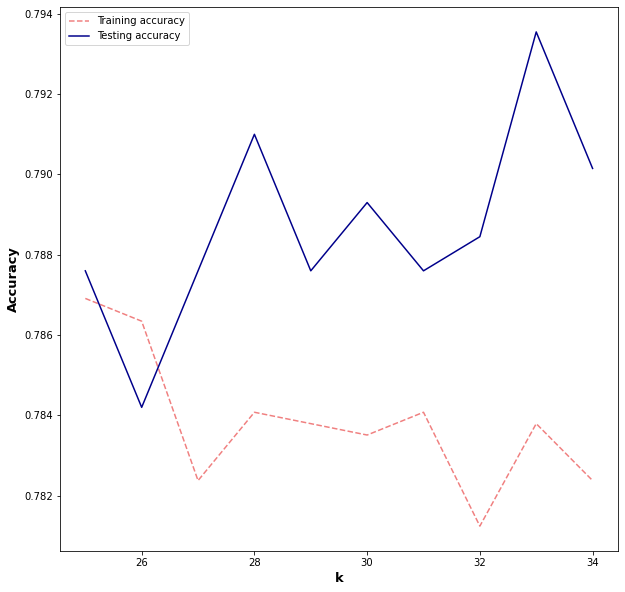

In [82]:
def elbow_plot(X_train, y_train, X_test, y_test, k_range=10):
    training_accuracy = []
    testing_accuracy = []
               
    if isinstance(k_range, int):
        k_range = list(range(1, k_range))
    else:
        k_range = list(k_range)
               
    label_style = {"weight": "bold",
                   "size": 13}
    
    # Calculate the training and test scores up to k_max - 1
    for k in k_range:
        knn = KNeighborsClassifier(k).fit(X_train, y_train)
        training_accuracy.append(knn.score(X_train, y_train))
        testing_accuracy.append(knn.score(X_test, y_test))
    
    # Plot both and label
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.lineplot(x=k_range, y=training_accuracy,
                 color="lightcoral", ax=ax,
                 label="Training accuracy",
                 linestyle='--')
    sns.lineplot(x=k_range, y=testing_accuracy,
                 label="Testing accuracy",
                 color="darkblue", ax=ax)
    ax.set_ylabel("Accuracy",
                  fontdict=label_style)
    ax.set_xlabel("k",
                  fontdict=label_style)
    
    return fig, ax

elbow_plot(X_train, y_train, X_test, y_test, range(25, 35))

### And now we have some caveats

As mentioned a few times by now, our data are not exactly the best for ML. However, the real world messiness is entertaining. While the elbow plot is very inconsistent we have an elbow of sorts at 26 or 27 (which seems fairly high). Elbow plots are sometimes ambiguous as we see from the plot above.

The next step after finding an optimal `k` is to refit the model with a new value of `n_neighbors`. But before we do that we should visualize the training and test points to get a feel at why low `k` learns the noise in a data set and why high `k` underfits. Plotting all of our data is a bit hard due to amount of observations.

Random data is simpler to visualize, so let's take take a quick detour to examine fake data!

(<Figure size 720x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Random data with three classes'}>)

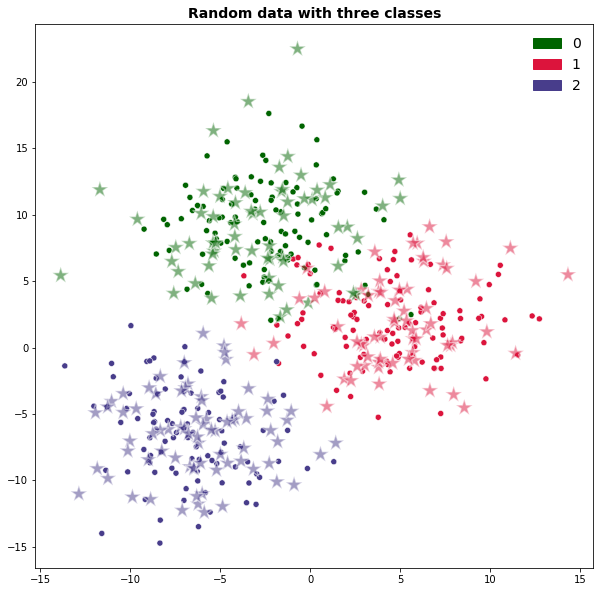

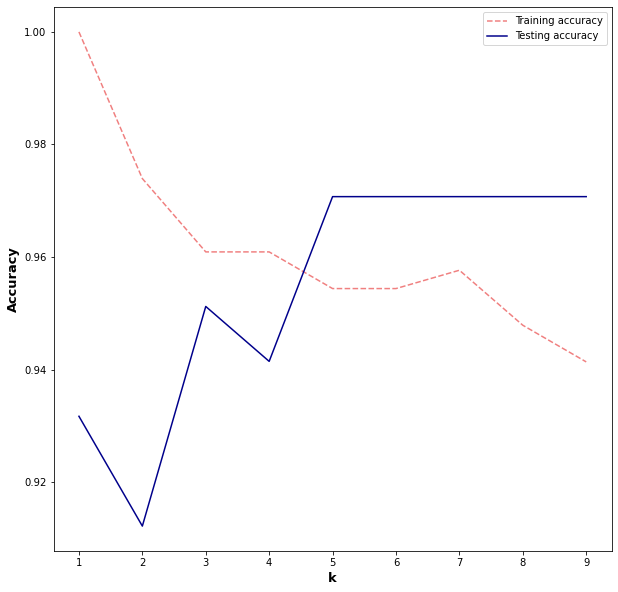

In [72]:
from sklearn.datasets import make_blobs
from matplotlib.patches import Patch

def random_data_test():
    X, y = make_blobs(512,
                      cluster_std=[3.5, 3.14, 3.24],
                      random_state=42)    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=.4,
                                                        random_state=42)
    
    # Overengineered colors solution
    colors_labs = {"0": "darkgreen",
                   "1": "crimson",
                   "2": "darkslateblue"}
                   #"Test": "slategray"}
    colors = list(colors_labs.values())
        
    fig, ax = plt.subplots(figsize=(10, 10))
    # Training set
    sns.scatterplot(x=X_train[:, 0],
                    y=X_train[:, 1],
                    hue=y_train,
                    palette=colors,
                    legend=False,
                    ax=ax)
    # Unlabelled test points as stars
    sns.scatterplot(x=X_test[:, 0],
                    y=X_test[:, 1],
                    hue=y_test,
                    palette=colors,
                    alpha=0.5,
                    ax=ax,
                    marker="*",
                    s=300)
    
    # Labels and legend
    ax.set_title("Random data with three classes",
                 fontweight="bold",
                 fontsize=14)
    
    handles = [Patch(color=pair[1], label=pair[0]) for pair in colors_labs.items()]
    ax.legend(handles=handles,
              loc="upper right",
              fontsize=14,
              frameon=False)
        
    # Elbow plot to visualize best k
    elbow_plot(X_train, y_train, X_test, y_test)
    
    return fig, ax

random_data_test()

Generating random data is useful, right? Notice how the training set is perfectly accurate with `n_neighbors=1` but steadily decreases for higher levels of `k`. Eventually, our plots shows an elbow at `n_neighbors=5` where the testing accuracy score surpasses the training score and remains like that for several `k`.

We don't show what happens beyond a `k` of 9, but if anyone is curious the model eventually underfits and both scores plummet.

Regardless, the plotted generated data helps us see how a KNN model with fit. We can see that `n_neighbors=1` would incorrectly predict several testing points for example. The plot also shows that some error on the testing set is inevitable because we have strange observations that are far from their classes in the data space. This is known as irreducible error, and irreducible error is a fact of life.

### The end of a dive into KNN

By now we discussed several facets of KNN yet we can go on ad nauseam about characteristics of the model. Hopefully you can see both the simplicity and the complexities of ML in general from this small model. KNN is simple to implement by hand as you essentially just calculate the distance between your new point and your training data then calculate the probability using the `k` neighbors with the lowest distances. Much of ML is simple to explain in words while having endless complexities in crafting models themselves.

We weren't able to include hot topics such as **feature engineering**, **scaling**, or **cross validation** in this section despite both being important parts of the ML process. We did not cover how to encode categoricals either. The scale of ML is vast!

Scikit-learn makes it easy to swap and play with models as discussed earlier. Each model class follows the same paradigm of `fit()` and `predict()` which allows researchers and programmers to focus on the problem domain. KNN has a lot of problems. For example, linear models outperform KNN in higher dimensions. KNN is a slow algorithm, especially in higher dimensions. KNN is sensitive to features, scaling, and the distance metric. KNN is fun to talk about but impractical in many situations. Let's fit another algorithm using all of the data just because it's easy.

In [113]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=3.9,
                                n_jobs=-1,
                                random_state=42).fit(X_train, y_train)

print(f"Random forests training score: {rf_clf.score(X_train, y_train)}")
print(f"Random forests testing score: {rf_clf.score(X_test, y_test)}")

Random forests training score: 0.8084443185038255
Random forests testing score: 0.8147833474936279


Of course, fitting models pseudorandomly is silly. However, random forests outperformed KNN in the example above despite incorrect use which is always fun to see. Domain knowledge about the model types as well as choosing hyperparameters is important. But sklearn's breezy API allows us to swap models with ease.

### Try it yourself 

Try fitting a KNN model yourself. We'll stick to classification here to be directly relevant to the introduction above. The process


<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/unsup.jpg"> <a id=3></a>

## PCA 

In [223]:
Data = pd.read_json("https://data.cityofnewyork.us/resource/h5f7-3btz.json")

Data



,pub_dt,fisc_yr,agy_nm,exp,cap_repr,cap_mgtn
0,20200416,2021,Health and Hospitals Corporation,1.228660e+08,9.834587e+08,7.568733e+08
1,20200416,2021,Department of Parks and Recreation,9.447368e+07,7.748664e+08,2.451435e+08
2,20200416,2021,Department of Environmental Protection,6.169037e+08,2.635274e+08,2.948563e+08
3,20200416,2021,Department of Education / School Construction ...,9.488819e+07,5.443869e+08,1.916224e+08
4,20200416,2021,Department of Transportation,1.049950e+07,1.274047e+08,4.604212e+06
5,20200416,2021,Police Department,2.021640e+08,8.080028e+07,1.132206e+07
6,20200416,2021,Fire Department,2.547157e+07,1.996169e+08,4.047178e+06
7,20200416,2021,Department of Sanitation,1.771236e+08,2.905189e+07,1.100613e+07
8,20200416,2021,Department of Cultural Affairs,1.169097e+06,1.218306e+08,6.926632e+07
9,20200416,2021,Department of Corrections,3.375761e+06,7.047919e+07,1.498538e+07


In [224]:
#Standardize the Data

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
x = Data[['exp', 'cap_repr', 'cap_mgtn']]

In [227]:
y = Data[['agy_nm']]

In [228]:
x = StandardScaler().fit_transform(x)

In [229]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #Set up the model, and we only want to collapse these data into two dimensions. 
principalComponents = pca.fit_transform(x) #Take our data--saved as x--and run the model.

In [230]:
#Now let's take the results--saved as principalComponents--and save it to a DataFrame.
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [231]:
finalDf = pd.concat([principalDf, Data[['agy_nm']]], axis = 1)

In [232]:
finalDf.head()

,principal component 1,principal component 2,agy_nm
0,1.763721,-0.742329,Health and Hospitals Corporation
1,0.525637,-0.545801,Department of Parks and Recreation
2,0.896682,2.839576,Department of Environmental Protection
3,0.075826,-0.346903,Department of Education / School Construction ...
4,-1.065777,-0.442990,Department of Transportation


In [233]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

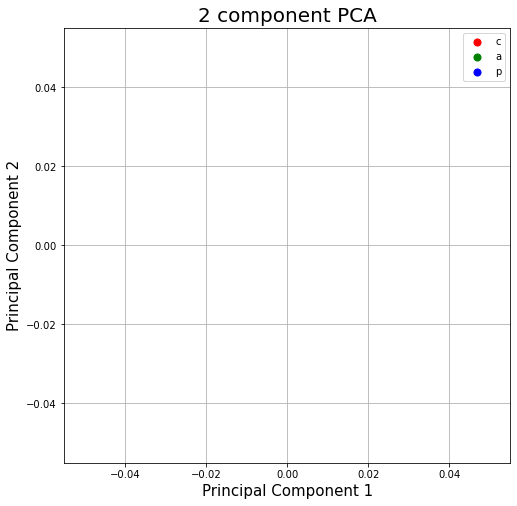

In [234]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
agy_nm = ['exp', 'cap_repr', 'cap_mgtn']
colors = ['r', 'g', 'b']
for agy_nm, color in zip(agy_nm,colors):
    indicesToKeep = finalDf['agy_nm'] == agy_nm
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(agy_nm)
ax.grid()